In [7]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv')

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [12]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min() ))

In [13]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluv = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [16]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

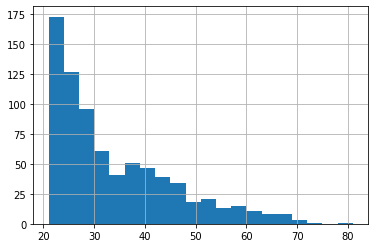

In [17]:
diabetes['Age'].hist(bins=20)

In [18]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [19]:
feat_cols = [num_preg,plasma_gluv,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [20]:
feat_cols

[NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), 

In [51]:
# Train and test split

In [52]:
x_data = diabetes.drop('Class',axis=1)

In [53]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [54]:
labels = diabetes['Class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size = 0.3)

In [56]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [57]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0w59ei9a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f853c10acd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [58]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0w59ei9a/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 603.938
INFO:tensorflow:loss = 4.837006, step = 101 (0.166 sec)
INFO:tensorflow:global_step/sec: 905.018
INFO:tensorflow:loss = 4.1247506, step = 201 (0.111 sec)
INFO:tensorflow:global_step/sec: 888.166
INFO:tensorflow:loss = 5.3061485, step = 301 (0.112 sec)
INFO:tensorflow:global_step/sec: 893.038
INFO:tensorflow:loss = 5.580797, step = 401 (0.112 sec)
INFO:tensorflow:global_step/sec: 887.404
INFO:tensorflow:loss = 5.0661564, step = 501 (0.113 sec)
INFO:tensorflow:global_step/sec: 888.298
INFO:tensorflow:loss = 4.9941854, step = 601 (0.112 sec)
INFO:tensorflow:global_step/sec: 902.399
INFO:tensorflow:los

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10,num_epochs=1,shuffle=False)

In [60]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-25T11:19:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0w59ei9a/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-25-11:19:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75605214, accuracy_baseline = 0.6480447, auc = 0.81297517, auc_precision_recall = 0.6832572, average_loss = 0.5097386, global_step = 1000, label/mean = 0.3519553, loss = 5.0690675, precision = 0.70714283, prediction/mean = 0.33254665, recall = 0.52380955
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp0w59ei9a/model.ckpt-1000


In [61]:
results

{'accuracy': 0.75605214,
 'accuracy_baseline': 0.6480447,
 'auc': 0.81297517,
 'auc_precision_recall': 0.6832572,
 'average_loss': 0.5097386,
 'label/mean': 0.3519553,
 'loss': 5.0690675,
 'precision': 0.70714283,
 'prediction/mean': 0.33254665,
 'recall': 0.52380955,
 'global_step': 1000}

In [62]:
## Predictions

In [63]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=10,num_epochs=1,shuffle=False)

In [64]:
predictions = model.predict(pred_input_func)

In [65]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0w59ei9a/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [66]:
my_pred

[{'logits': array([0.5577245], dtype=float32),
  'logistic': array([0.6359259], dtype=float32),
  'probabilities': array([0.36407414, 0.6359258 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.4735035], dtype=float32),
  'logistic': array([0.18641067], dtype=float32),
  'probabilities': array([0.81358933, 0.1864107 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.57493126], dtype=float32),
  'logistic': array([0.36009973], dtype=float32),
  'probabilities': array([0.63990027, 0.36009973], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.10322511], dtype=float32),
  'logistic': array([0.4742166], dtype=float32),
  'probabilities': array([0.5257834 , 0.47421664], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([1.2015659], dtype=float32),
  'logistic': 

In [67]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbwkdj1vn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8526d6d150>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [69]:
feat_cols = [num_preg,plasma_gluv,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [71]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [72]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8_rq9o93', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f852419d050>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8_rq9o93/model.ckpt.
INFO:tensorflow:loss = 7.5001163, step = 1
INFO:tensorflow:global_step/sec: 554.618
INFO:tensorflow:loss = 6.372619, step = 101 (0.181 sec)
INFO:tensorflow:global_step/sec: 754.882
INFO:tensorflow:loss = 5.35652, step = 201 (0.132 sec)
INFO:tensorflow:global_step/sec: 734.594
INFO:tensorflow:loss = 5.325597, step = 301 (0.137 sec)
INFO:tensorflow:global_step/sec: 602.984
INFO:tensorflow:loss = 4.526008, step = 401 (0.168 sec)
INFO:tensorflow:global_step/sec: 691.469
INFO:tensorflow:loss = 6.177026, step = 501 (

In [75]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [77]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-25T11:23:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8_rq9o93/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-25-11:23:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6926407, accuracy_baseline = 0.6580087, auc = 0.7563292, auc_precision_recall = 0.5364541, average_loss = 0.59375113, global_step = 1000, label/mean = 0.34199134, loss = 5.7148547, precision = 0.5689655, prediction/mean = 0.2786133, recall = 0.4177215
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp8_rq9o93/model.ckpt-1000


{'accuracy': 0.6926407,
 'accuracy_baseline': 0.6580087,
 'auc': 0.7563292,
 'auc_precision_recall': 0.5364541,
 'average_loss': 0.59375113,
 'label/mean': 0.34199134,
 'loss': 5.7148547,
 'precision': 0.5689655,
 'prediction/mean': 0.2786133,
 'recall': 0.4177215,
 'global_step': 1000}